In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

df = pd.read_csv('usps_digit_recognizer.csv')

In [2]:
#make X and Y
X = df.iloc[:,1:]

y = df.label
levels=np.unique(y)

Y = np.vstack((levels == i for i in y)) + 0

In [3]:
#make design matrix
np.random.seed(34)
select_rows=np.random.permutation(X.shape[0])

Phi = X.copy()


cols=Phi.columns
def ind(r,c): return 28*r +c
def col_name(r,c,d): return cols[ind(r,c)]+'_'+cols[ind(r,c)+d][5:]

# Make cross-products of neighboring pixels
for row in range(28):
    for col in range(28):
        if col < 27: #horizontal neighbors cross-product
            Phi[col_name(row,col,1)]=X.iloc[:,ind(row,col)] * X.iloc[:,ind(row,col)+1]
        if row < 27: #vertical neighbors cross-product
            Phi[col_name(row,col,28)]=X.iloc[:,ind(row,col)] * X.iloc[:,ind(row,col)+28]
        if (row < 27) & (col < 27): #diagonal neighbors cross-product
            Phi[col_name(row,col,29)]=X.iloc[:,ind(row,col)] * X.iloc[:,ind(row,col)+29]
        if (row > 0) & (col < 27): #diagonal neighbors cross-product
            Phi[col_name(row,col,-27)]=X.iloc[:,ind(row,col)] * X.iloc[:,ind(row,col)-27]

            
Phi = Phi.loc[:,Phi.max() != 0]

Phi = (Phi - Phi.min()) / (Phi.max() - Phi.min()).apply(lambda x: np.maximum(1,x))

Phi.insert(0,column='ones', value=1)
Phi = np.array(Phi)

train = .6*X.shape[0]
rest= (X.shape[0] - train) // 2
phi_train = Phi[select_rows < train,:]
Y_train = Y[select_rows < train,:]

phi_cv = Phi[(select_rows >= train) & (select_rows < train + rest),:]
Y_cv = Y[(select_rows >= train) & (select_rows < train + rest),:]


phi_test = Phi[ (select_rows >= train + rest),:]
Y_test = Y[(select_rows >= train + rest),:]

In [4]:
#useful functions
def softmax(H):
    eH=np.exp(H)
    return eH / eH.dot(np.ones((H.shape[1],eH.shape[1])))

def cross_entropy(Y,P):
    return -np.sum(Y*np.log(P))

def accuracy(Y,P):
    return np.mean(Y.argmax(axis=1)==P.argmax(axis=1))


accuracy at loop 499 is: 0.9156746031746031
accuracy at loop 999 is: 0.9251190476190476
accuracy at loop 1499 is: 0.9299603174603175
accuracy at loop 1999 is: 0.9333730158730159
accuracy at loop 2499 is: 0.9357936507936508
accuracy at loop 2999 is: 0.9373015873015873
accuracy at loop 3499 is: 0.9383730158730159
accuracy at loop 3999 is: 0.9396031746031746
accuracy at loop 4499 is: 0.9405555555555556
accuracy at loop 4999 is: 0.9411904761904762
accuracy at loop 5499 is: 0.9416666666666667
accuracy at loop 5999 is: 0.9421428571428572
accuracy at loop 6499 is: 0.9428571428571428
accuracy at loop 6999 is: 0.9433333333333334
accuracy at loop 7499 is: 0.9436904761904762
accuracy at loop 7999 is: 0.9438888888888889
accuracy at loop 8499 is: 0.9441269841269841
accuracy at loop 8999 is: 0.9445634920634921
accuracy at loop 9499 is: 0.9450396825396825
accuracy at loop 9999 is: 0.9454365079365079
accuracy at loop 10499 is: 0.9456349206349206
accuracy at loop 10999 is: 0.9459920634920634
accuracy a

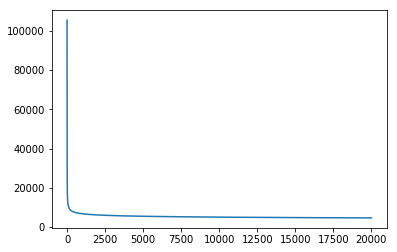

In [71]:
#fit model without engineered pixels
w=np.random.rand(phi_train.shape[1], Y_train.shape[1])

eta = 3e-5

start = time.time()
epochs = int(2e4)
J=np.zeros(epochs)
start=time.time()
for e in range(epochs):
    P = softmax(phi_train.dot(w))
    J[e]=cross_entropy(Y_train,P)
    w -= eta * phi_train.T.dot(P - Y_train)
    if np.mod(e,500) ==499:
        print("accuracy at loop {} is: {}".format(e,accuracy(Y_train,P)))

print("Elapsed time: {}".format(time.time() - start))
print("Accuracy is: {}".format(accuracy(Y_train,P)))
plt.plot(J)
w_none=w.copy()

In [83]:
#fit model with engineered features (i.e., neighboring pixels cross products)
w=np.random.rand(phi_train.shape[1], Y_train.shape[1])

eta = 3e-5

start = time.time()
epochs = int(1e4)
J=np.zeros(epochs)
start=time.time()
for e in range(epochs):
    P = softmax(phi_train.dot(w))
#    J[e]=cross_entropy(Y_train,P)
    w -= eta * phi_train.T.dot(P - Y_train)
    if np.mod(e,1000) == 0:
        print("accuracy at loop {} is: {}".format(e,accuracy(Y_train,P)))

print("Elapsed time: {}".format(time.time() - start))
print("Accuracy is: {}".format(accuracy(Y_train,P)))
#plt.plot(J)
w_pair=w.copy()

accuracy at loop 0 is: 0.05559523809523809
accuracy at loop 1000 is: 0.9641666666666666
accuracy at loop 2000 is: 0.9794047619047619
accuracy at loop 3000 is: 0.9863095238095239
accuracy at loop 4000 is: 0.9898809523809524
accuracy at loop 5000 is: 0.9923809523809524
accuracy at loop 6000 is: 0.9946825396825397
accuracy at loop 7000 is: 0.9958333333333333
accuracy at loop 8000 is: 0.996904761904762
accuracy at loop 9000 is: 0.9976587301587302
Elapsed time: 2204.6122341156006
Accuracy is: 0.9981349206349206


Lambda1: 0 Lambda2: 0 Elapsed time: 1128.8003675937653
accuracy_train:0.9984920634920635 accuracy_cv:0.9677380952380953
Lambda1: 0 Lambda2: 1 Elapsed time: 2255.454142332077
accuracy_train:0.9987301587301587 accuracy_cv:0.9679761904761904
Lambda1: 0 Lambda2: 2 Elapsed time: 3383.219047307968
accuracy_train:0.9987301587301587 accuracy_cv:0.9678571428571429
Lambda1: 0 Lambda2: 3 Elapsed time: 4507.7233464717865
accuracy_train:0.998452380952381 accuracy_cv:0.9675
Lambda1: 1 Lambda2: 0 Elapsed time: 5632.358317375183
accuracy_train:0.9970238095238095 accuracy_cv:0.9672619047619048
Lambda1: 1 Lambda2: 1 Elapsed time: 6760.490128993988
accuracy_train:0.9953571428571428 accuracy_cv:0.9657142857142857
Lambda1: 1 Lambda2: 2 Elapsed time: 7886.716931343079
accuracy_train:0.9926190476190476 accuracy_cv:0.9652380952380952
Lambda1: 1 Lambda2: 3 Elapsed time: 9012.096560716629
accuracy_train:0.9908333333333333 accuracy_cv:0.9644047619047619
Lambda1: 2 Lambda2: 0 Elapsed time: 10137.96695137024
accur

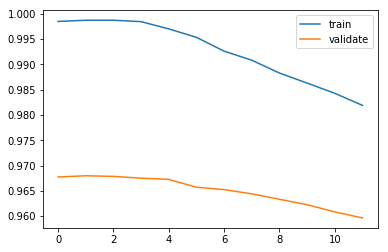

In [126]:
#fit ElasticNet

L1=np.arange(0,3)
L2=np.arange(0,4)


start = time.time()
epochs = int(5e3)
J_train=[]
accuracy_train = []
J_cv=[]
accuracy_cv = []


start=time.time()

for lamb1 in L1:
    for lamb2 in L2:
        eta = 1e-5
        for e in range(epochs):
            P = softmax(phi_train.dot(w))
            w -= eta * (phi_train.T.dot(P - Y_train) + lamb2 * w + lamb1 *np.sign(w))
            if np.mod(e,999) == 0:
                eta+= 1e-5
        print("Lambda1: {} Lambda2: {} Elapsed time: {}".format(lamb1, lamb2, time.time() - start))
        print("accuracy_train:{} accuracy_cv:{}".format(accuracy(Y_train,P),accuracy(Y_cv,softmax(phi_cv.dot(w)))))
        J_train.append(cross_entropy(Y_train,P)/Y_train.shape[0])
        accuracy_train.append(accuracy(Y_train,P))
        
        P = softmax(phi_cv.dot(w))
        J_cv.append(cross_entropy(Y_cv,P)/Y_cv.shape[0])
        accuracy_cv.append(accuracy(Y_cv,P))
        

plt.plot(accuracy_train, label='train')
plt.plot(accuracy_cv, label='validate')
plt.legend();

w_elastic=w.copy()

Lambda2: 0 Elapsed time: 1599.8193109035492
accuracy_train:0.9971428571428571 accuracy_cv:0.9667857142857142
Lambda2: 1 Elapsed time: 3173.977238178253
accuracy_train:0.9982142857142857 accuracy_cv:0.9667857142857142
Lambda2: 2 Elapsed time: 4735.977644443512
accuracy_train:0.9982142857142857 accuracy_cv:0.9670238095238095
Lambda2: 3 Elapsed time: 6296.020308971405
accuracy_train:0.9974603174603175 accuracy_cv:0.9675
Lambda2: 4 Elapsed time: 7858.715400695801
accuracy_train:0.9959523809523809 accuracy_cv:0.9664285714285714
Lambda2: 5 Elapsed time: 9419.265251636505
accuracy_train:0.9944444444444445 accuracy_cv:0.9654761904761905
Lambda2: 6 Elapsed time: 10986.072406053543
accuracy_train:0.9927380952380952 accuracy_cv:0.964047619047619
Lambda2: 7 Elapsed time: 12546.341526031494
accuracy_train:0.9905952380952381 accuracy_cv:0.9633333333333334
Lambda2: 8 Elapsed time: 14107.195752859116
accuracy_train:0.9887698412698412 accuracy_cv:0.9627380952380953
Lambda2: 9 Elapsed time: 15649.649835

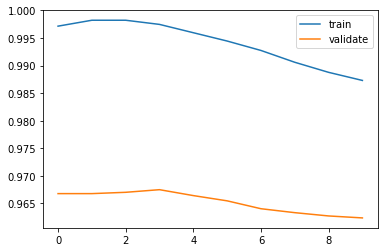

In [113]:
#fit Ridge Regression for a range of lambda2

w=w_pair.copy()

L2=np.arange(0,10)


start = time.time()
epochs = int(7e3)
J_train=[]
accuracy_train = []
J_cv=[]
accuracy_cv = []


start=time.time()

for lamb2 in L2:
    eta = 1e-5
    for e in range(epochs):
        P = softmax(phi_train.dot(w))
        w -= eta * (phi_train.T.dot(P - Y_train) + lamb2 * w)
        if np.mod(e,1000) == 0:
            eta+= 1e-5
    print("Lambda2: {} Elapsed time: {}".format(lamb2, time.time() - start))
    print("accuracy_train:{} accuracy_cv:{}".format(accuracy(Y_train,P),accuracy(Y_cv,softmax(phi_cv.dot(w)))))
    J_train.append(cross_entropy(Y_train,P)/Y_train.shape[0])
    accuracy_train.append(accuracy(Y_train,P))
        
    P = softmax(phi_cv.dot(w))
    J_cv.append(cross_entropy(Y_cv,P)/Y_cv.shape[0])
    accuracy_cv.append(accuracy(Y_cv,P))
        

plt.plot(accuracy_train, label='train')
plt.plot(accuracy_cv, label='validate')
plt.legend();



In [6]:
#fit ridge with best lambda (from ElasticNet above)

w=np.random.rand(phi_train.shape[1], Y_train.shape[1])
#w=w_pair.copy()

lamb2 = 1


start = time.time()
epochs = int(1e4)

eta = 1e-5
for e in range(epochs):
    P = softmax(phi_train.dot(w))
    w -= eta * (phi_train.T.dot(P - Y_train) + lamb2 * w)
    if np.mod(e,1000) == 0:
        eta+= 1e-5
        print("Lambda2: {} Elapsed time: {}".format(lamb2, time.time() - start))
        print("accuracy_train:{} accuracy_cv:{}".format(accuracy(Y_train,P),accuracy(Y_cv,softmax(phi_cv.dot(w)))))

w_best=w.copy()

Lambda2: 1 Elapsed time: 0.2432560920715332
accuracy_train:0.13130952380952382 accuracy_cv:0.15321428571428572
Lambda2: 1 Elapsed time: 214.99711918830872
accuracy_train:0.9516666666666667 accuracy_cv:0.9323809523809524
Lambda2: 1 Elapsed time: 431.67578196525574
accuracy_train:0.9749603174603174 accuracy_cv:0.9480952380952381
Lambda2: 1 Elapsed time: 647.8164849281311
accuracy_train:0.9857142857142858 accuracy_cv:0.9548809523809524
Lambda2: 1 Elapsed time: 864.3064937591553
accuracy_train:0.9913095238095239 accuracy_cv:0.9596428571428571


KeyboardInterrupt: 

In [7]:
print('Accuracy on the Test Set is {}'.format(accuracy(Y_test,softmax(phi_test.dot(w)))))

Accuracy on the Test Set is 0.9598809523809524


In [8]:
#compare correct and incorrect classificatiosn
X_test = X.loc[(select_rows >= train + rest),:]
P_test = softmax(phi_test.dot(w))
y_test = Y_test.argmax(axis=1)
correct_test= ( P_test.argmax(axis=1) == y_test ) + 0

Y_hat_test=np.apply_along_axis(lambda x: x == max(x), 1, P_test) + 0

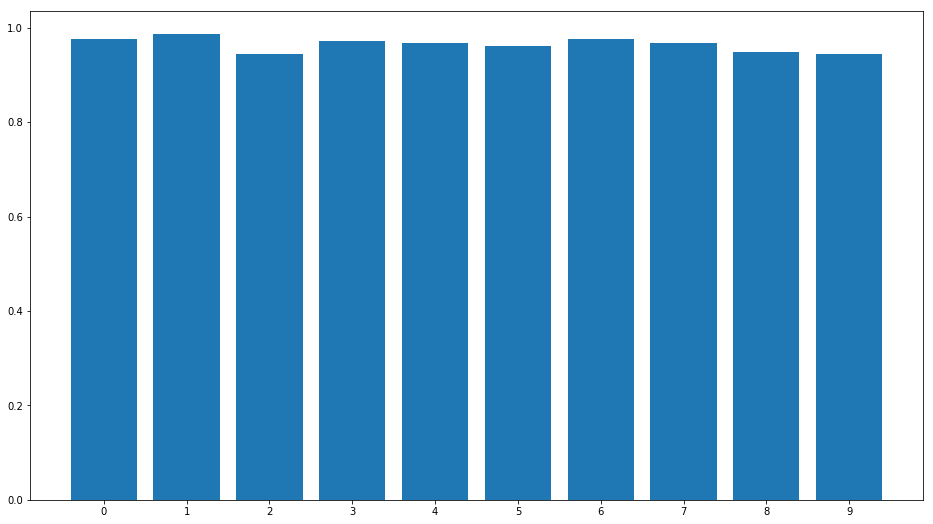

In [196]:
#accuracy by digit
plt.figure(figsize=(16,9))
digit_accuracy= np.vstack([(i, np.mean(correct_test[y_test==i])) for i in np.unique(y_test)])
plt.bar(digit_accuracy[:,0],digit_accuracy[:,1]);
plt.xticks(np.arange(10));

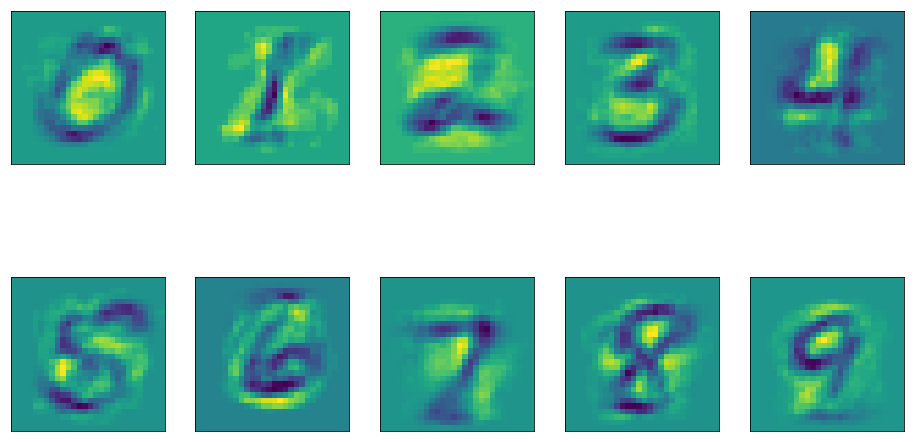

In [10]:
# make heatmaps of correct and incorrect classifications
X_heat=np.vstack([(np.mean(X_test.loc[(y_test==i),:])) for i in np.unique(y_test)])
X_cor_heat=np.vstack([(np.mean(X_test.loc[(correct_test==1) & (y_test==i),:])) for i in np.unique(y_test)])
X_incor_heat=np.vstack([(np.mean(X_test.loc[(correct_test==0) & (y_test==i),:])) for i in np.unique(y_test)])

# print 10 digit heatmaps
f, ax = plt.subplots(2,5, figsize=(16,9))
for i in range(10):
    ax[i//5,i%5].imshow(X_heat[i,:].reshape(28,28))
    ax[i//5,i%5].set_xticks([])
    ax[i//5,i%5].set_yticks([])
    
#plt.savefig('images/Heat_all.png')

# print 10 correct digits
f, ax = plt.subplots(2,5, figsize=(16,9))
for i in range(10):
    ax[i//5,i%5].imshow(X_cor_heat[i,:].reshape(28,28))
    ax[i//5,i%5].set_xticks([])
    ax[i//5,i%5].set_yticks([])
    
#plt.savefig('images/Heat_cor.png')

# print 10 incorrect digits
f, ax = plt.subplots(2,5, figsize=(16,9))
for i in range(10):
    ax[i//5,i%5].imshow(X_incor_heat[i,:].reshape(28,28))
    ax[i//5,i%5].set_xticks([])
    ax[i//5,i%5].set_yticks([])
    
#plt.savefig('images/Heat_incor.png')

In [41]:
#w_full[X.max() != 0,:] = w[:708,:]
w_full[X.max() != 0,:]

array([[ 0.23622382,  2.14157552,  0.72043862, ...,  1.57964816,
        -2.89650675, -0.46927745],
       [ 0.21076592,  0.32244838,  0.16211763, ...,  0.60819447,
         0.52233903,  0.50855164],
       [ 0.77981068,  0.43602064,  0.67789443, ...,  0.83243081,
         0.42828567,  0.28836432],
       ...,
       [ 0.35021679,  0.58555103,  0.80507596, ...,  0.17774163,
         0.59776172,  0.41950343],
       [ 0.61561331,  0.58120847,  0.41006065, ...,  0.74145916,
         0.10904871,  0.73026733],
       [ 0.42272212,  0.447487  ,  0.19887542, ...,  0.06806499,
         0.51357765,  0.62864534]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

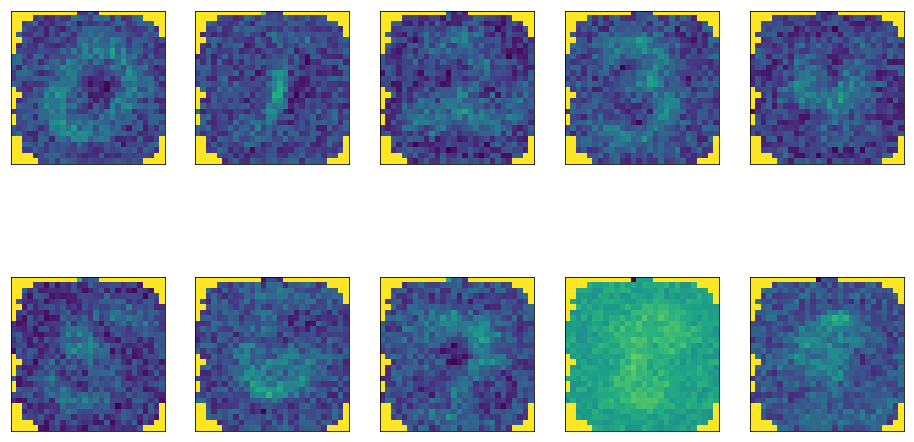

In [43]:
# make heatmaps of correct and incorrect classifications
X_heat=np.vstack([(np.mean(X_test.loc[(y_test==i),:])) for i in np.unique(y_test)])

w_full=np.zeros((X_heat.shape[1],10))
w_int= (w[:708,:]+w[:708,:].min())

w_full[X.max() != 0,:] = 255* w_int / w_int.max()

X_heat-=w_full.T

f, ax = plt.subplots(2,5, figsize=(16,9))
for i in range(10):
    ax[i//5,i%5].imshow(X_heat[i,:].reshape(28,28))
    ax[i//5,i%5].set_xticks([])
    ax[i//5,i%5].set_yticks([])
X_heat